In [1]:
import sklearn
import shap

/home/masuarez/tools/anaconda3/envs/py3.9-pt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


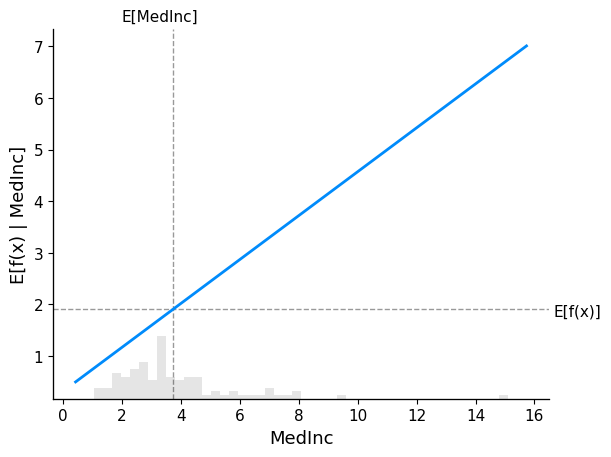

In [4]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

ExactExplainer explainer: 1001it [00:10,  1.57it/s]                                             


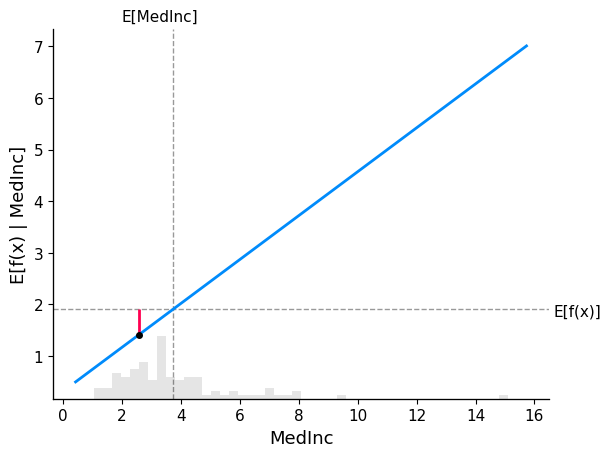

In [5]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1, :],
)